<a href="https://colab.research.google.com/github/samreed83/Analysis_Projects/blob/main/Ukraine_War.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.simplefilter('ignore')

In [76]:
df_e = pd.read_csv('https://raw.githubusercontent.com/brandynewanek/brandynewanek/main/russia_losses_equipment.csv')
df_p = pd.read_csv('https://raw.githubusercontent.com/brandynewanek/brandynewanek/main/russia_losses_personnel.csv')

In [77]:
df_e.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles,greatest losses direction
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,NaN,NaN,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,NaN,NaN,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,NaN,NaN,NaN,NaN


In [78]:
df_p.head()

,date,day,personnel,personnel*,POW
0,2022-02-25,2,2800,about,0
1,2022-02-26,3,4300,about,0
2,2022-02-27,4,4500,about,0
3,2022-02-28,5,5300,about,0
4,2022-03-01,6,5710,about,200


In [79]:
df=df_e.merge(df_p, how='outer',on='date')

In [80]:
df.head()

,date,day_x,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,...,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles,greatest losses direction,day_y,personnel,personnel*,POW
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,...,0,NaN,NaN,NaN,NaN,NaN,2,2800,about,0
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,...,0,NaN,NaN,NaN,NaN,NaN,3,4300,about,0
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,...,0,NaN,NaN,NaN,NaN,NaN,4,4500,about,0
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,...,5,NaN,NaN,NaN,NaN,NaN,5,5300,about,0
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,...,7,NaN,NaN,NaN,NaN,NaN,6,5710,about,200


In [81]:
df.columns

Index(['date', 'day_x', 'aircraft', 'helicopter', 'tank', 'APC',
       'field artillery', 'MRL', 'military auto', 'fuel tank', 'drone',
       'naval ship', 'anti-aircraft warfare', 'special equipment',
       'mobile SRBM system', 'vehicles and fuel tanks', 'cruise missiles',
       'greatest losses direction', 'day_y', 'personnel', 'personnel*', 'POW'],
      dtype='object')

In [82]:
df['month'] =pd.DatetimeIndex(df['date']).month
df['dayofweek'] =pd.DatetimeIndex(df['date']).dayofweek

In [83]:
df['month']

,month
0,2
1,2
2,2
3,2
4,3
...,...
115,6
116,6
117,6
118,6


In [84]:
df.set_index('date',inplace=True)

In [85]:
df.head()

,day_x,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,...,mobile SRBM system,vehicles and fuel tanks,cruise missiles,greatest losses direction,day_y,personnel,personnel*,POW,month,dayofweek
date,,,,,,,,,,,,,,,,,,,,,
2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,...,NaN,NaN,NaN,NaN,2,2800,about,0,2,4
2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,...,NaN,NaN,NaN,NaN,3,4300,about,0,2,5
2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,...,NaN,NaN,NaN,NaN,4,4500,about,0,2,6
2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,...,NaN,NaN,NaN,NaN,5,5300,about,0,2,0
2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,...,NaN,NaN,NaN,NaN,6,5710,about,200,3,1


In [86]:
import matplotlib
matplotlib.style.use('bmh')

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 2022-02-25 to 2022-06-24
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   day_x                      120 non-null    int64  
 1   aircraft                   120 non-null    int64  
 2   helicopter                 120 non-null    int64  
 3   tank                       120 non-null    int64  
 4   APC                        120 non-null    int64  
 5   field artillery            120 non-null    int64  
 6   MRL                        120 non-null    int64  
 7   military auto              65 non-null     float64
 8   fuel tank                  65 non-null     float64
 9   drone                      120 non-null    int64  
 10  naval ship                 120 non-null    int64  
 11  anti-aircraft warfare      120 non-null    int64  
 12  special equipment          101 non-null    float64
 13  mobile SRBM system         36 non-null 

In [88]:
df.isnull().sum()


,0
day_x,0
aircraft,0
helicopter,0
tank,0
APC,0
field artillery,0
MRL,0
military auto,55
fuel tank,55
drone,0


In [89]:
palette = ['#639BA9', '#D6B862', '#D1684E', '#695872', '#8BC2B2']

In [90]:
for feat in df.columns:
  if (df[feat].dtype=='float')|(df[feat].dtype=='int'):
    df[f'{feat}_pct_change'] = df[feat].pct_change() * df[feat].max()

In [91]:
for feat in df.columns:
  if (df[feat].dtype=='float')|(df[feat].dtype=='int'):
    df[f'{feat}_diff']=df[feat].diff()

In [92]:
df.columns

Index(['day_x', 'aircraft', 'helicopter', 'tank', 'APC', 'field artillery',
       'MRL', 'military auto', 'fuel tank', 'drone', 'naval ship',
       'anti-aircraft warfare', 'special equipment', 'mobile SRBM system',
       'vehicles and fuel tanks', 'cruise missiles',
       'greatest losses direction', 'day_y', 'personnel', 'personnel*', 'POW',
       'month', 'dayofweek', 'day_x_pct_change', 'aircraft_pct_change',
       'helicopter_pct_change', 'tank_pct_change', 'APC_pct_change',
       'field artillery_pct_change', 'MRL_pct_change',
       'military auto_pct_change', 'fuel tank_pct_change', 'drone_pct_change',
       'naval ship_pct_change', 'anti-aircraft warfare_pct_change',
       'special equipment_pct_change', 'mobile SRBM system_pct_change',
       'vehicles and fuel tanks_pct_change', 'cruise missiles_pct_change',
       'day_y_pct_change', 'personnel_pct_change', 'POW_pct_change',
       'day_x_diff', 'aircraft_diff', 'helicopter_diff', 'tank_diff',
       'APC_diff', 'f

In [93]:
df[['day_x_diff', 'aircraft_diff', 'helicopter_diff', 'tank_diff',
       'APC_diff', 'field artillery_diff', 'MRL_diff', 'military auto_diff',
       'fuel tank_diff', 'drone_diff', 'naval ship_diff',
       'anti-aircraft warfare_diff', 'special equipment_diff',
       'mobile SRBM system_diff', 'vehicles and fuel tanks_diff',
       'cruise missiles_diff', 'day_y_diff', 'personnel_diff', 'POW_diff',
       'day_x_pct_change_diff', 'aircraft_pct_change_diff',
       'helicopter_pct_change_diff', 'tank_pct_change_diff',
       'APC_pct_change_diff', 'field artillery_pct_change_diff',
       'MRL_pct_change_diff', 'military auto_pct_change_diff',
       'fuel tank_pct_change_diff', 'drone_pct_change_diff',
       'naval ship_pct_change_diff', 'anti-aircraft warfare_pct_change_diff',
       'special equipment_pct_change_diff',
       'mobile SRBM system_pct_change_diff',
       'vehicles and fuel tanks_pct_change_diff',
       'cruise missiles_pct_change_diff', 'day_y_pct_change_diff',
       'personnel_pct_change_diff', 'POW_pct_change_diff']].isnull().sum()

,0
day_x_diff,1
aircraft_diff,1
helicopter_diff,1
tank_diff,1
APC_diff,1
field artillery_diff,1
MRL_diff,1
military auto_diff,56
fuel tank_diff,56
drone_diff,1


In [94]:
diff_feats = ['day_x_diff', 'aircraft_diff', 'helicopter_diff', 'tank_diff',
       'APC_diff', 'field artillery_diff', 'MRL_diff', 'military auto_diff',
       'fuel tank_diff', 'drone_diff', 'naval ship_diff',
       'anti-aircraft warfare_diff', 'special equipment_diff',
       'mobile SRBM system_diff', 'vehicles and fuel tanks_diff',
       'cruise missiles_diff', 'day_y_diff', 'personnel_diff', 'POW_diff',
       'day_x_pct_change_diff', 'aircraft_pct_change_diff',
       'helicopter_pct_change_diff', 'tank_pct_change_diff',
       'APC_pct_change_diff', 'field artillery_pct_change_diff',
       'MRL_pct_change_diff', 'military auto_pct_change_diff',
       'fuel tank_pct_change_diff', 'drone_pct_change_diff',
       'naval ship_pct_change_diff', 'anti-aircraft warfare_pct_change_diff',
       'special equipment_pct_change_diff',
       'mobile SRBM system_pct_change_diff',
       'vehicles and fuel tanks_pct_change_diff',
       'cruise missiles_pct_change_diff', 'day_y_pct_change_diff',
       'personnel_pct_change_diff', 'POW_pct_change_diff']

In [95]:
for feat in diff_feats:
  df[feat]=df[feat].fillna(0)

In [130]:
feats_a =['aircraft','helicopter','drone']
feats_v =['tank','APC','naval ship']
feats_w=['field artillery','MRL','military auto','mobile SRBM system','cruise missiles']
feats_s=['fuel tank','anti-aircraft warfare','special equipment','vehicles and fuel tanks']
feats_p=['personnel','POW']

In [97]:
def feature_plot(feats):
  dim = len(feats)
  ax = df[[feat + '_pct_change' for feat in feats]].plot(kind='bar', alpha=0.65,
                                                        subplots= True, layout =(dim,1), figsize=(12,len(feats)*2.5), color=palette)

  df[feats].plot(kind='line', alpha=0.65,
                     subplots= True, layout =(dim,1), figsize=(12,len(feats)*2.5), color=palette, ax=ax)
  plt.locator_params(axis='x', nbins=20)
  plt.xticks(rotation=65)
  plt.show()

In [98]:
def month_plot_mean(feats):
  df.groupby('month').mean(numeric_only=True)[feats].plot(kind='bar', color=palette)
  plt.show()

In [99]:
def month_plot_sum(feats):
  df.groupby('month').sum()[[feat + '_diff' for feat in feats]].plot(kind='bar',color=palette)
  plt.show()

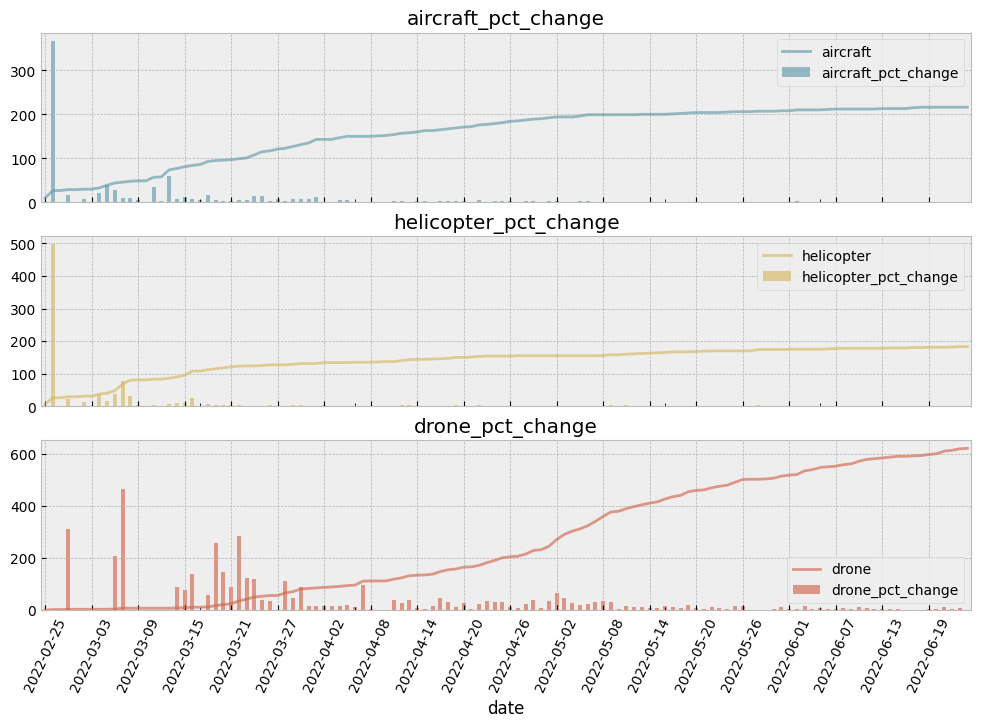

In [100]:
feature_plot(feats_a)

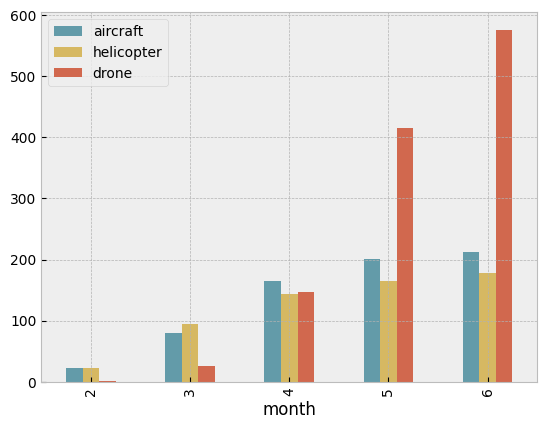

In [101]:
month_plot_mean(feats_a)

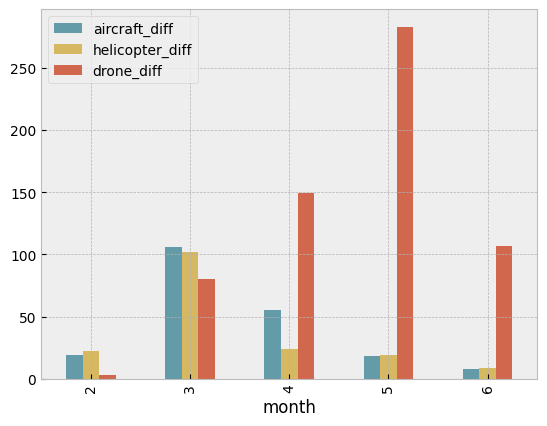

In [102]:
month_plot_sum(feats_a)


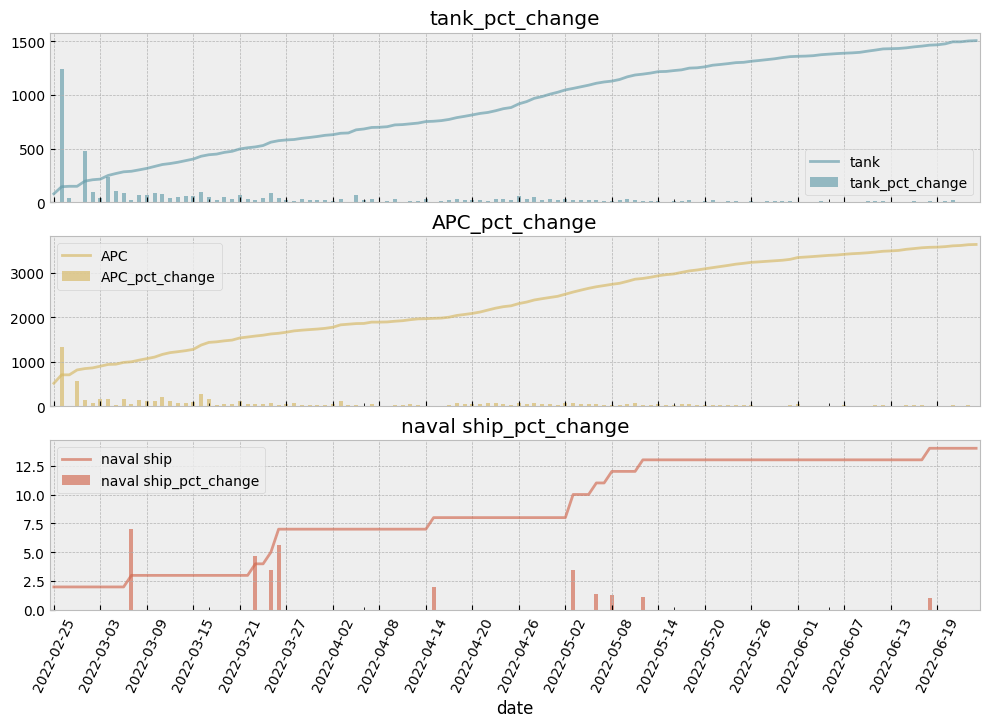

In [103]:
feature_plot(feats_v)

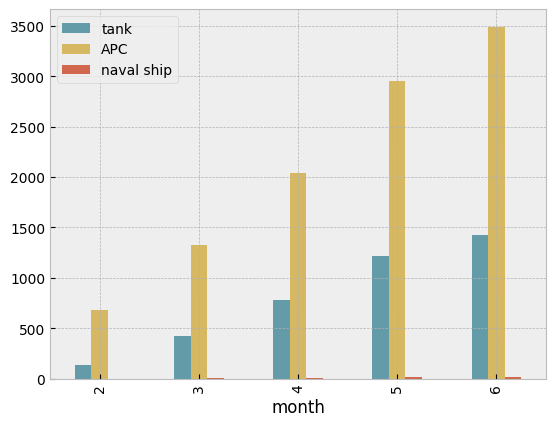

In [104]:
month_plot_mean(feats_v)

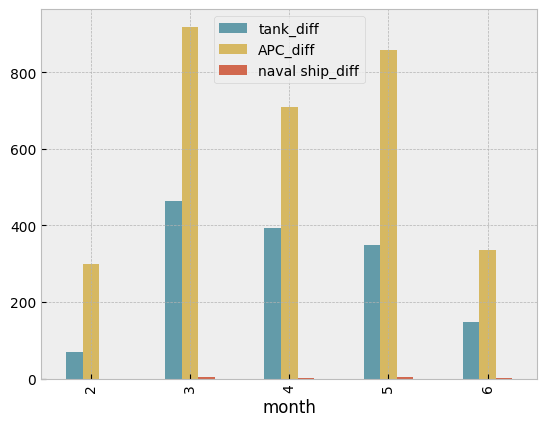

In [105]:
month_plot_sum(feats_v)

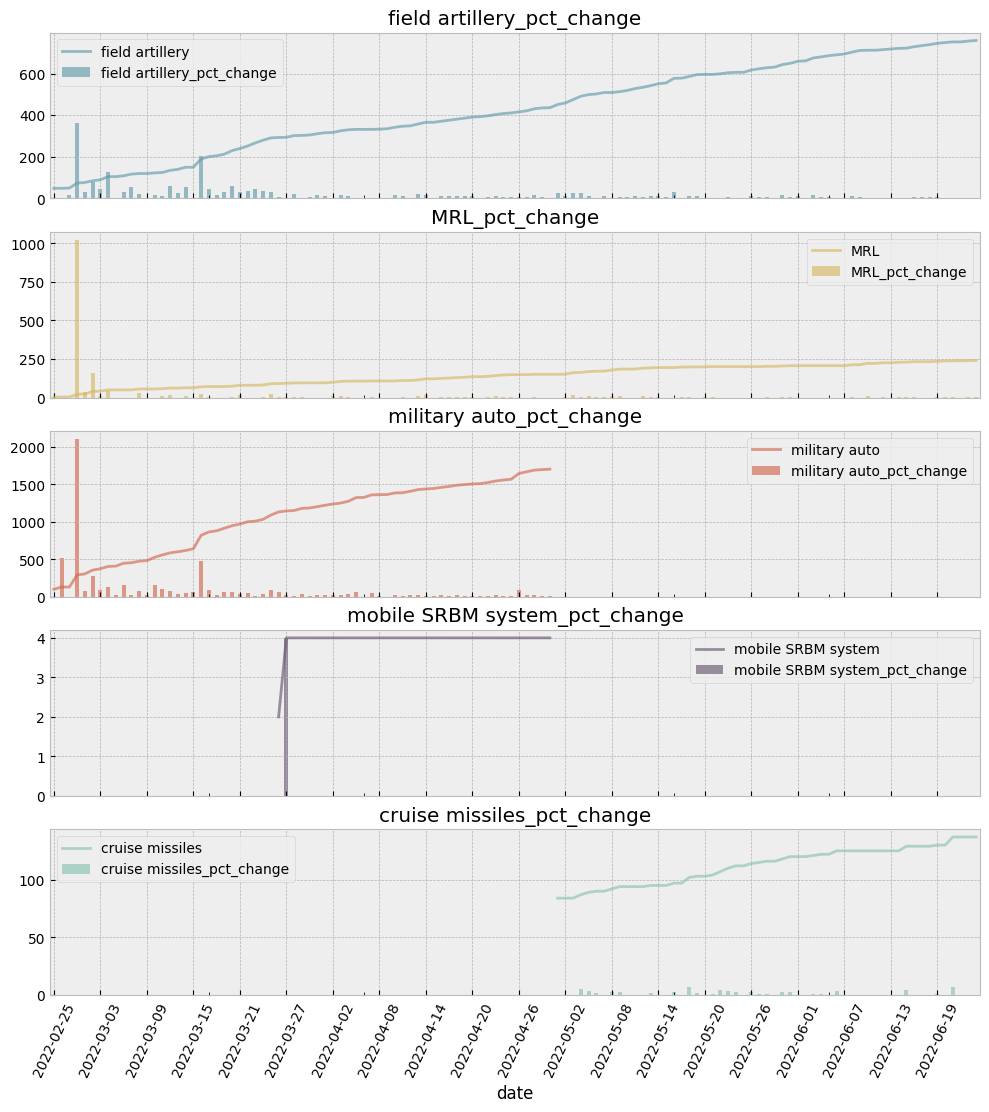

In [106]:
feature_plot(feats_w)

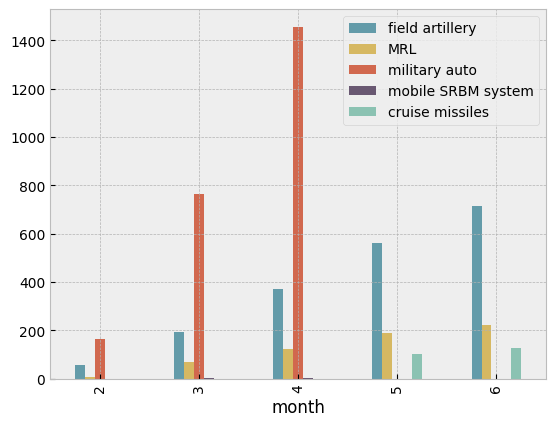

In [107]:
month_plot_mean(feats_w)

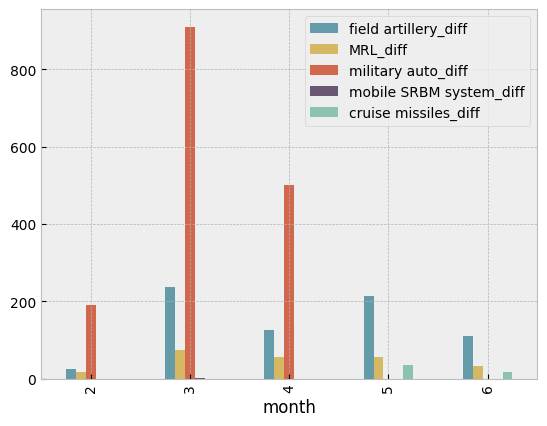

In [108]:
month_plot_sum(feats_w)

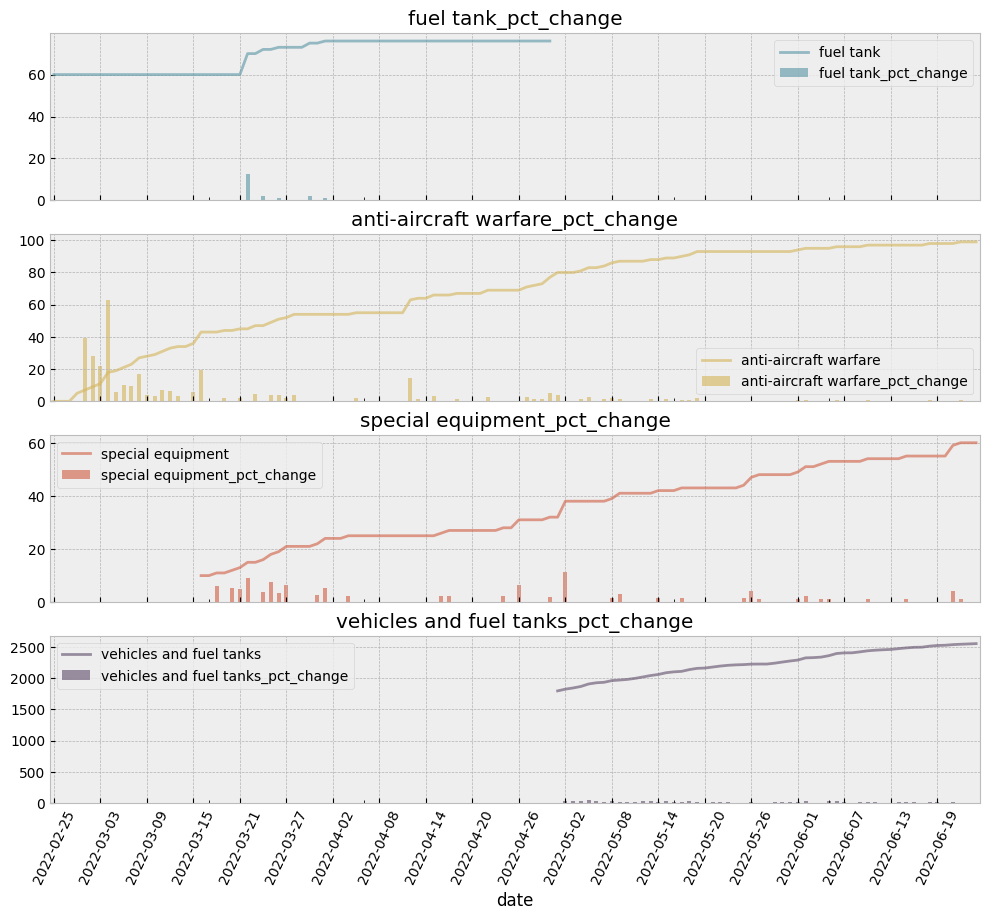

In [133]:
feature_plot(feats_s)

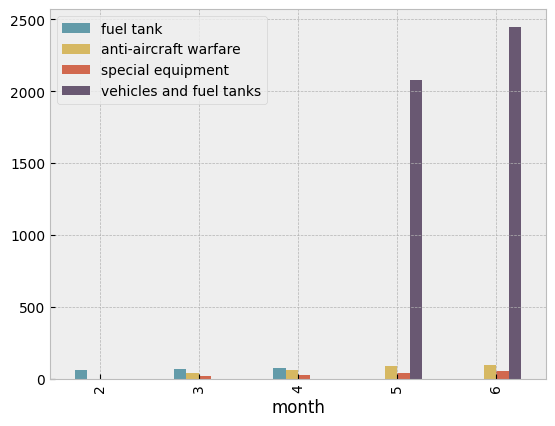

In [134]:
month_plot_mean(feats_s)

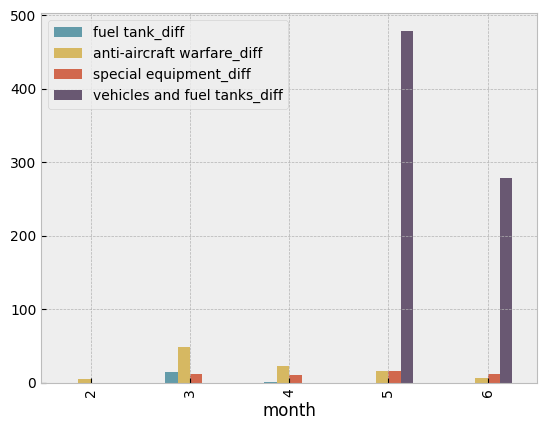

In [135]:
month_plot_sum(feats_s)

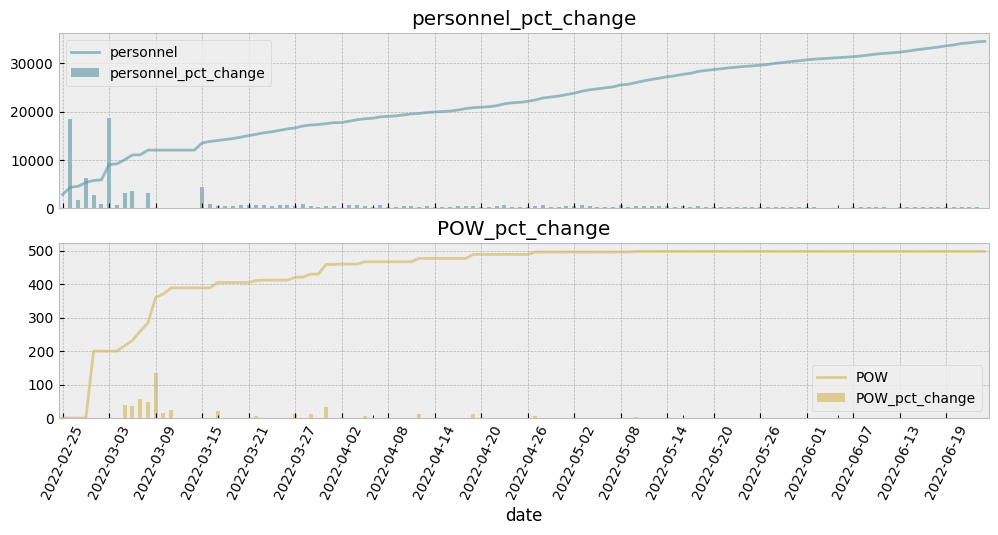

In [132]:
feature_plot(feats_p)

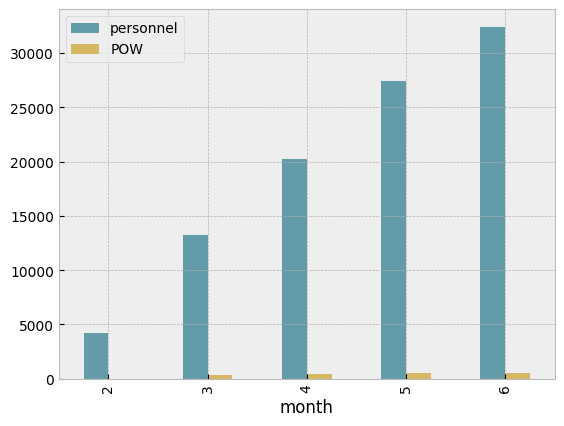

In [136]:
month_plot_mean(feats_p)

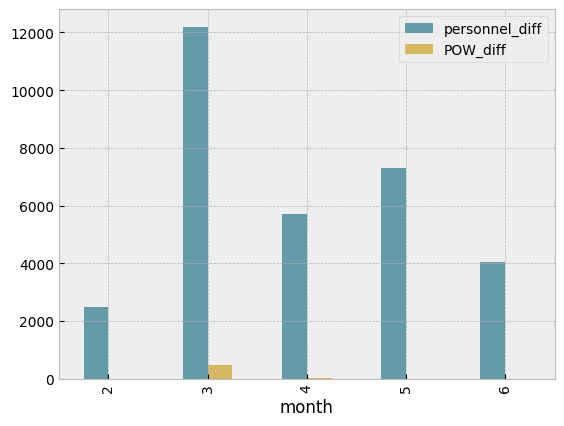

In [137]:
month_plot_sum(feats_p)

In [138]:
df['personnel*'].value_counts()

,count
personnel*,
about,114
more,6


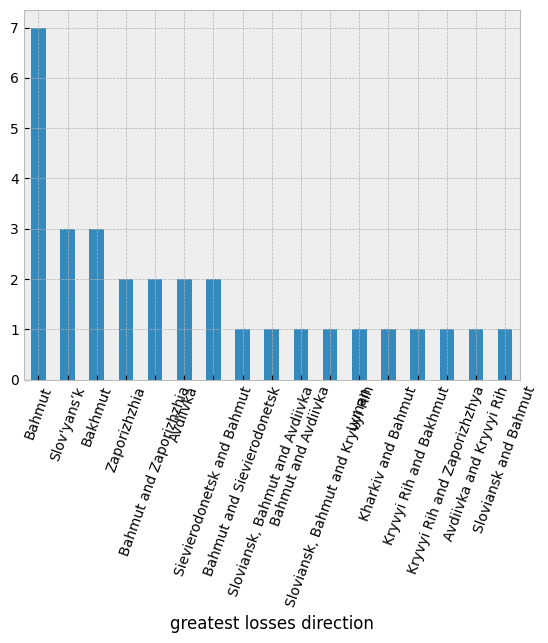

In [139]:
df['greatest losses direction'].value_counts().plot(kind='bar')
plt.xticks(rotation=70)
plt.show()


In [140]:
def make_cat(x):
  if x < 200:
    cat='low'
  elif x > 500:
    cat='high'
  else:
    cat='medium'
  return cat

In [141]:
df['personnel_diff_cat'] = df['personnel_diff'].apply(make_cat)

In [142]:
[feat+'_diff' for feat in feats_a]

['aircraft_diff', 'helicopter_diff', 'drone_diff']

In [150]:
def make_pairgrid(feats):
  g = sns.PairGrid(df[[l+['personnel_diff_cat'] for l in [[feat+'_diff' for feat in feats]]][0]].dropna(),
                   hue='personnel_diff_cat', palette=palette[:3])
  g.map_diag(sns.histplot)
  g.map_upper(sns.kdeplot)
  g.map_lower(sns.regplot)
  g.add_legend()
  plt.show()

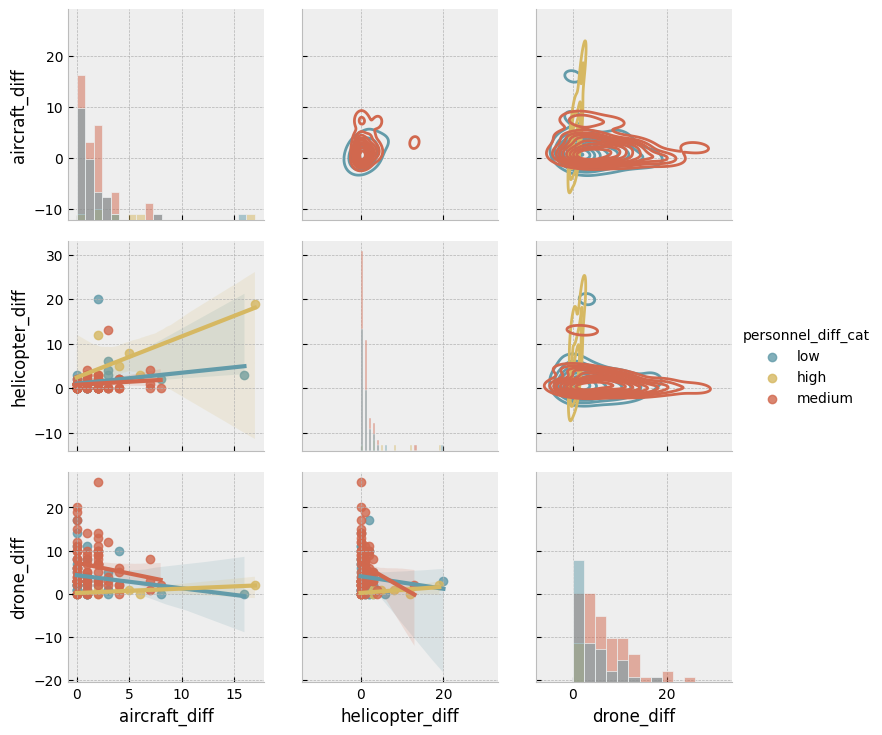

In [151]:
make_pairgrid(feats_a)

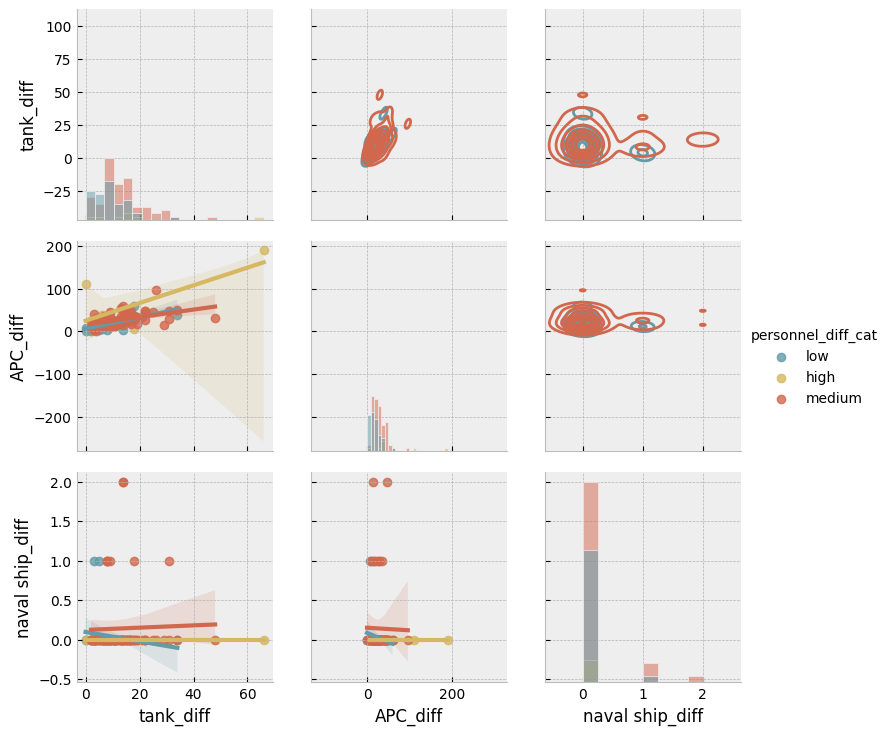

In [152]:
make_pairgrid(feats_v)

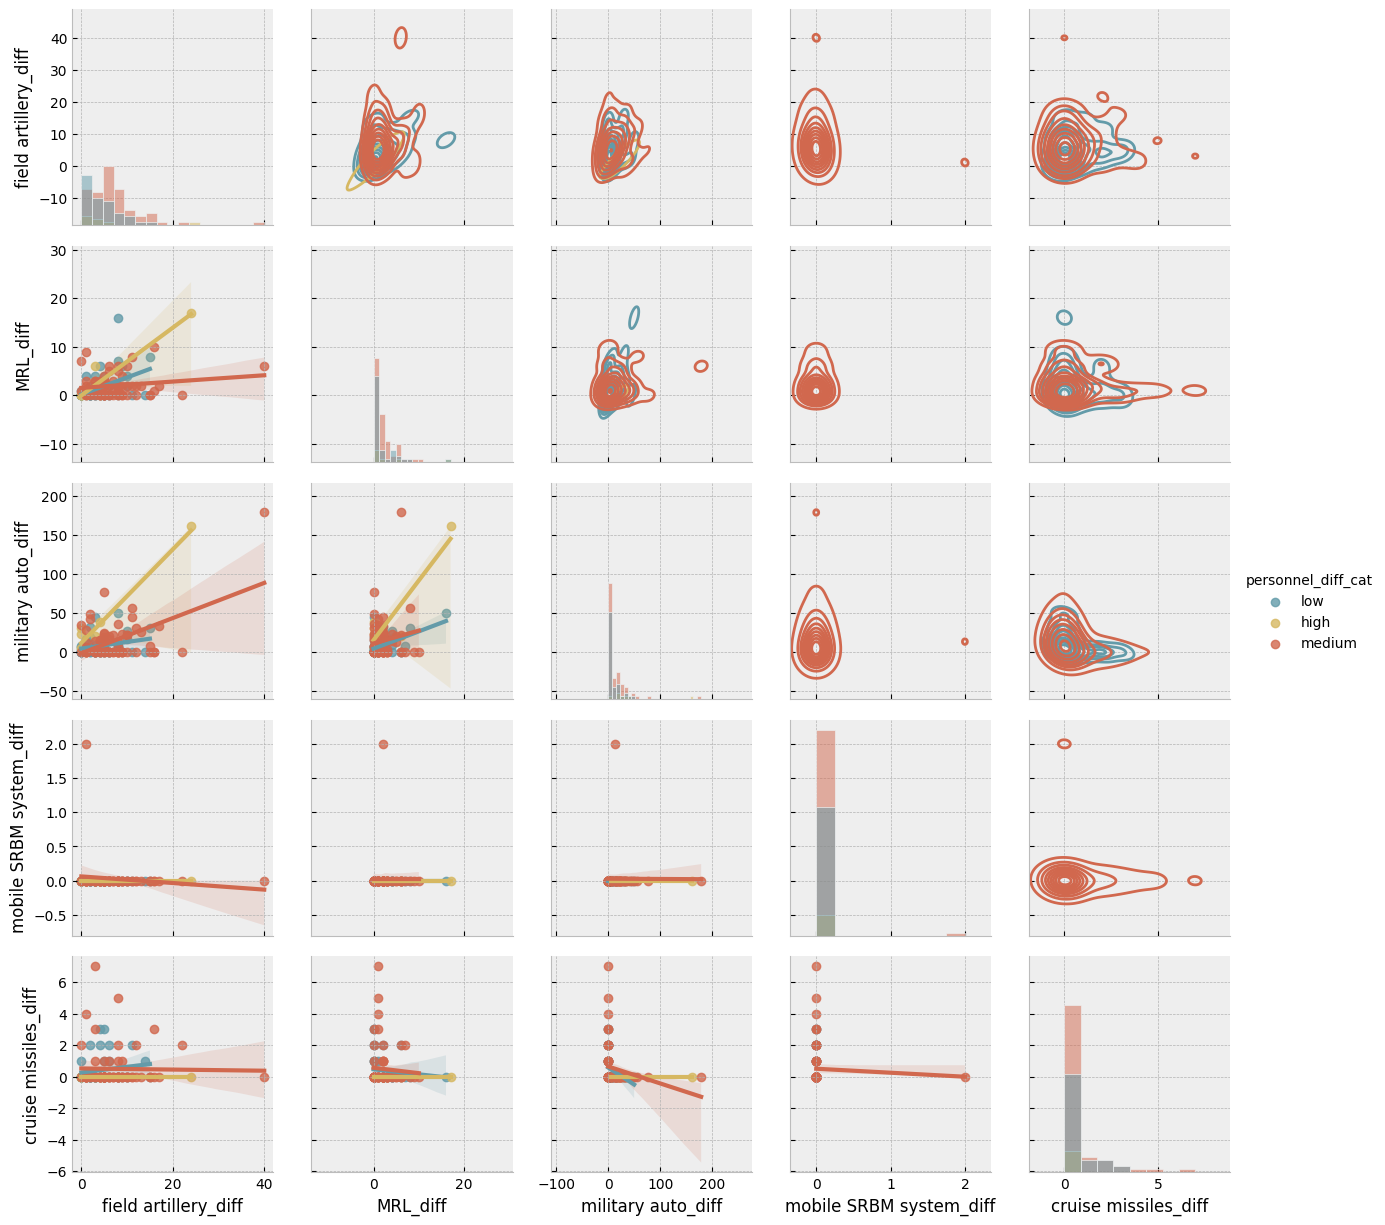

In [146]:
make_pairgrid(feats_w)

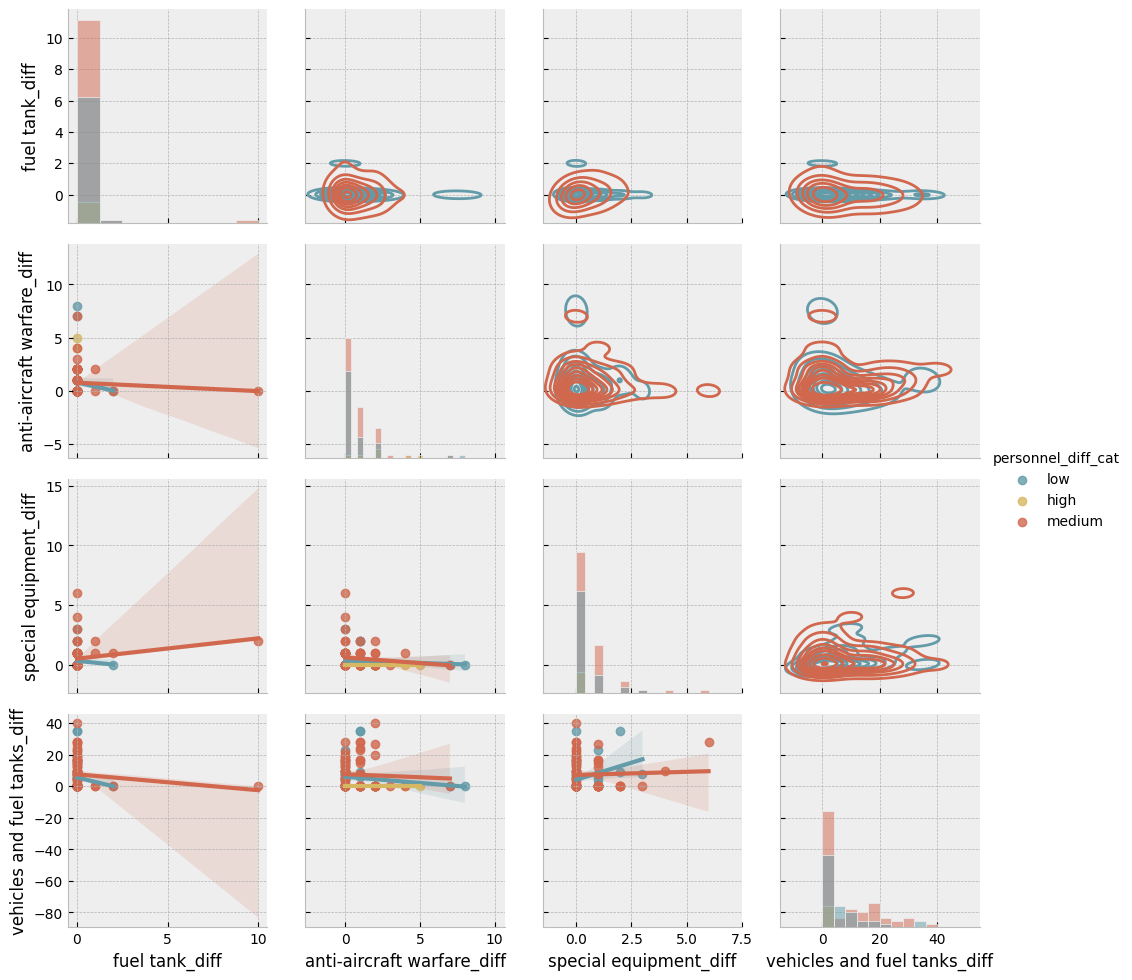

In [153]:
make_pairgrid(feats_s)

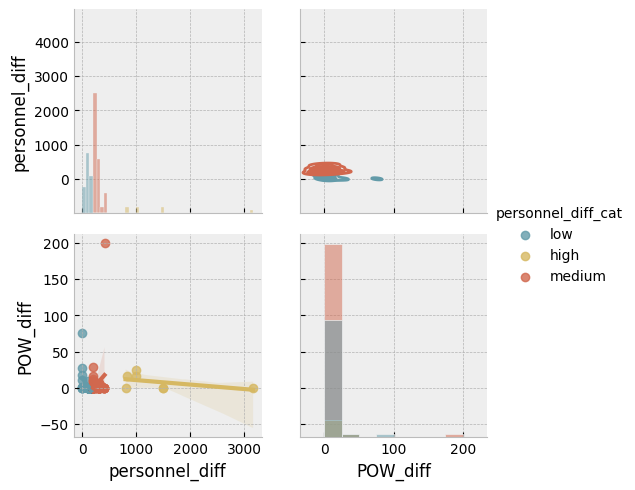

In [154]:
make_pairgrid(feats_p)

In [155]:
def corr_plot(feats):
  sns.heatmap(df[[feat+'_diff' for feat in feats]].corr(), annot=True,
              cmap=sns.diverging_palette(210, 25, l=65, center="light",
                                         as_cmap=True))
  plt.show()

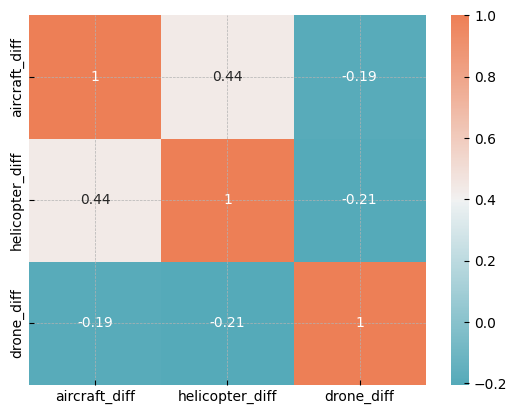

In [156]:
corr_plot(feats_a)

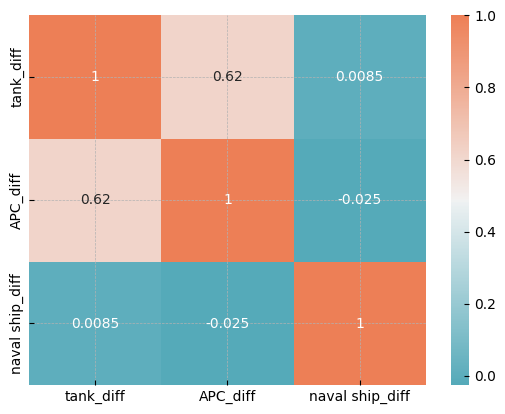

In [157]:
corr_plot(feats_v)

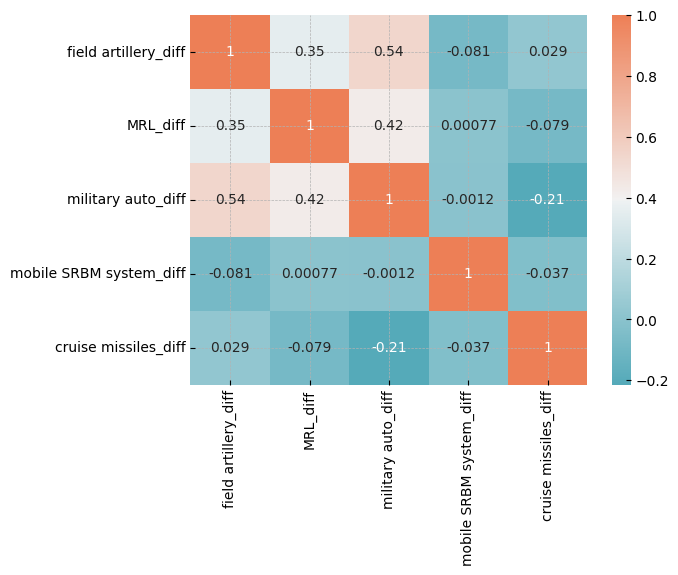

In [158]:
corr_plot(feats_w)

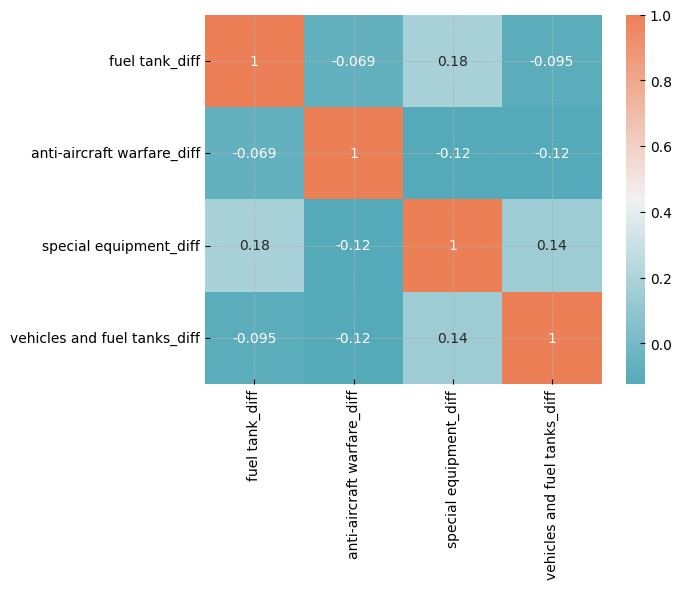

In [159]:
corr_plot(feats_s)

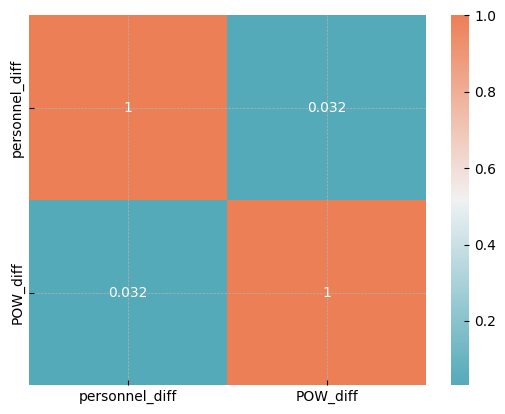

In [160]:
corr_plot(feats_p)

Observations


*   Losses in aircraft and helicopters show a correlation
*   APC and tanks also show a correlation
*   Military auto and field artillery show a mild correlation







In [161]:
feats_list = [feats_a,feats_v,feats_w,feats_s,feats_p]
feats_all = []
for feats in feats_list:
  feats_all.extend(feats)

In [162]:
feats_all

['aircraft',
 'helicopter',
 'drone',
 'tank',
 'APC',
 'naval ship',
 'field artillery',
 'MRL',
 'military auto',
 'mobile SRBM system',
 'cruise missiles',
 'fuel tank',
 'anti-aircraft warfare',
 'special equipment',
 'vehicles and fuel tanks',
 'personnel',
 'POW']

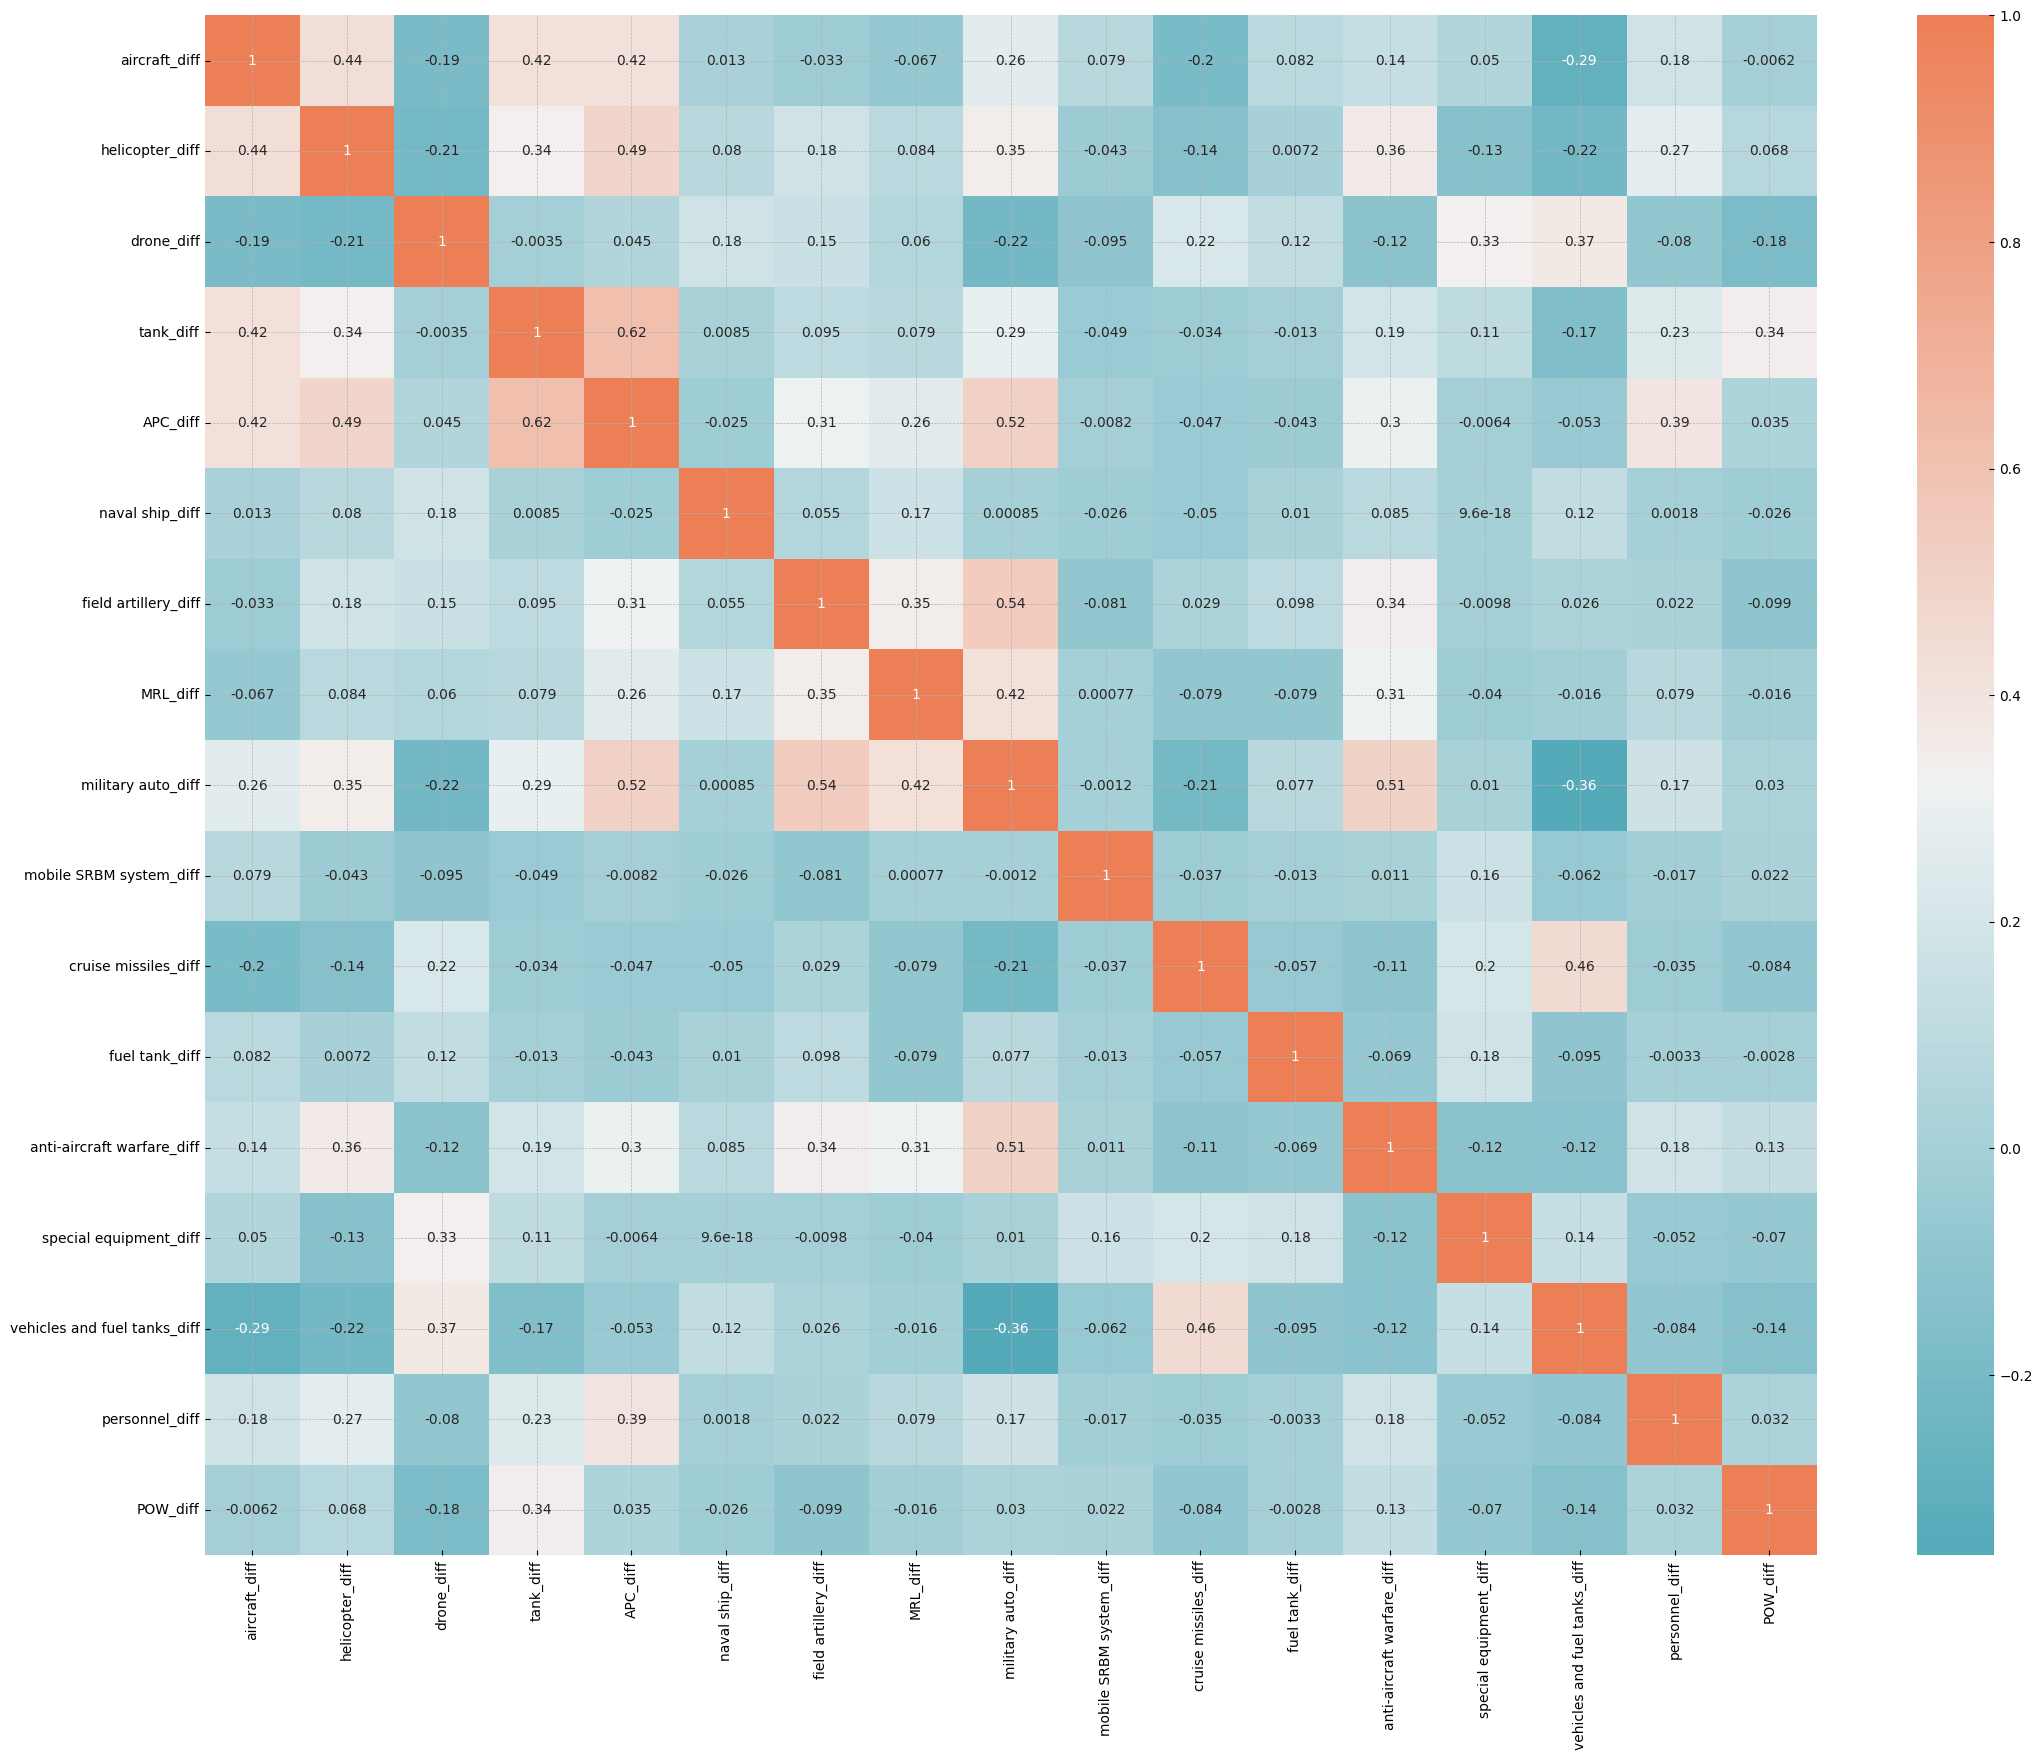

In [163]:
plt.figure(figsize=(26,20))
corr_plot(feats_all)